In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE



In [13]:
#loading the dataset 
df = pd.read_csv("C:\\Users\\joshy\\Documents\\college\\sem6\\ML_LAB\\strokedata.csv")

In [14]:
#Displying the first few rows 
print(df.head())

   gender   age  heart_disease ever_married      work_type Residence_type  \
0    Male  67.0              1          Yes        Private          Urban   
1  Female  61.0              0          Yes  Self-employed          Rural   
2    Male  80.0              1          Yes        Private          Rural   
3  Female  49.0              0          Yes        Private          Urban   
4  Female  79.0              0          Yes  Self-employed          Rural   

   avg_glucose_level   bmi   smoking_status  stroke  
0             228.69  36.6  formerly smoked       1  
1             202.21   NaN     never smoked       1  
2             105.92  32.5     never smoked       1  
3             171.23  34.4           smokes       1  
4             174.12  24.0     never smoked       1  


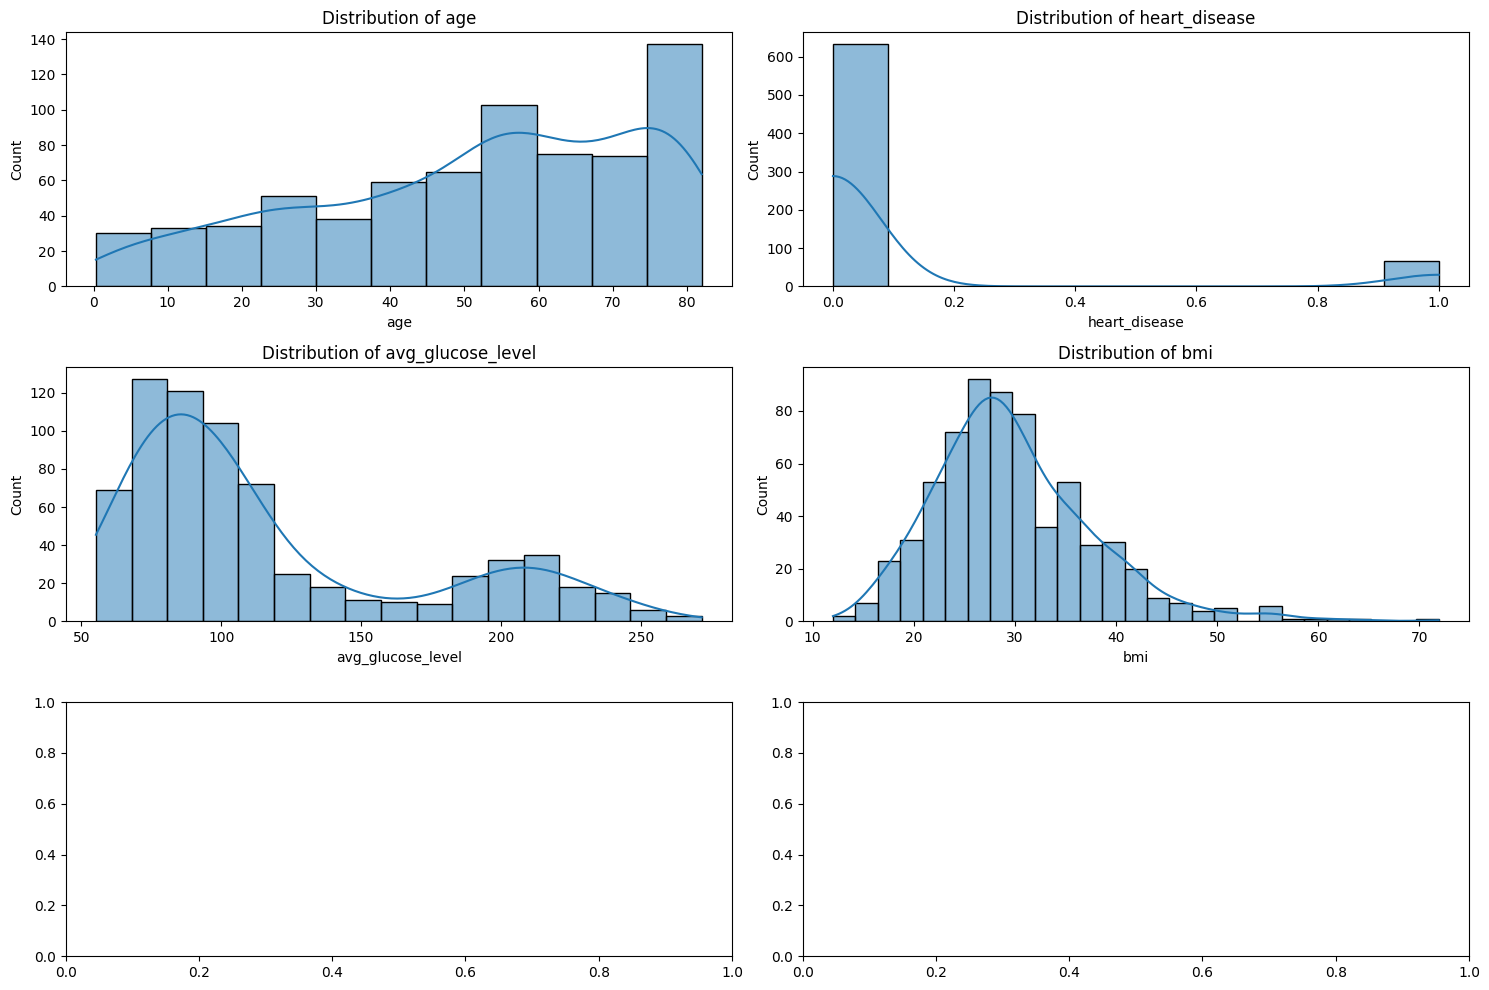

C:\Users\joshy\AppData\Local\Temp\ipykernel_36712\334234655.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='stroke', data=df, palette='coolwarm' )


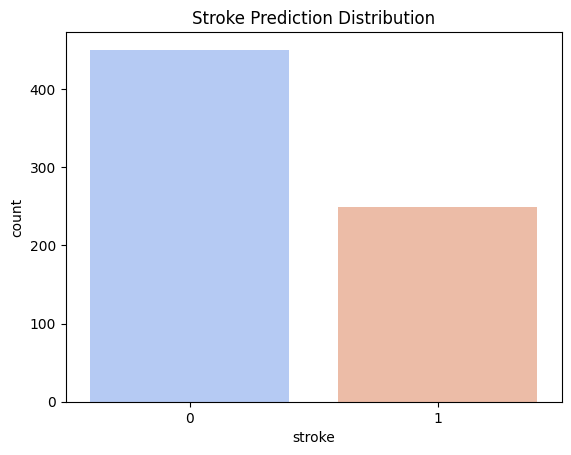

(gender                0
 age                   0
 heart_disease         0
 ever_married          0
 work_type             0
 Residence_type        0
 avg_glucose_level     0
 bmi                  49
 smoking_status        0
 stroke                0
 dtype: int64,
         gender         age  heart_disease ever_married work_type  \
 count      699  699.000000     699.000000          699       699   
 unique       2         NaN            NaN            2         5   
 top     Female         NaN            NaN          Yes   Private   
 freq       413         NaN            NaN          521       410   
 mean       NaN   51.474449       0.095851          NaN       NaN   
 std        NaN   22.416010       0.294598          NaN       NaN   
 min        NaN    0.320000       0.000000          NaN       NaN   
 25%        NaN   36.000000       0.000000          NaN       NaN   
 50%        NaN   55.000000       0.000000          NaN       NaN   
 75%        NaN   71.000000       0.000000   

In [15]:
missing_values = df.isnull().sum()
# Summary statistics
summary_stats = df.describe(include='all')
# Visualize the distribution of numerical features
numerical_features = ['age' , 'heart_disease' , 'avg_glucose_level' ,'bmi' ]
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 10))
axes = axes. flatten()

for i, feature in enumerate(numerical_features):
    sns.histplot(df[feature], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {feature}')

plt.tight_layout()
plt.show()

# Visualize the target variable
sns.countplot(x='stroke', data=df, palette='coolwarm' )
plt.title('Stroke Prediction Distribution' )
plt.show()

missing_values, summary_stats

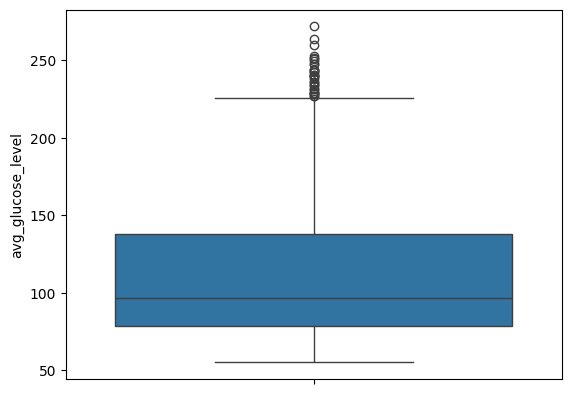

In [16]:
sns.boxplot(df['avg_glucose_level'])
plt.show()


In [17]:
# Check for missing values
print(df.isnull().sum())


gender                0
age                   0
heart_disease         0
ever_married          0
work_type             0
Residence_type        0
avg_glucose_level     0
bmi                  49
smoking_status        0
stroke                0
dtype: int64


In [18]:
# fill bmi using the median.
df['bmi'] = df['bmi'].fillna(df['bmi'].median())  

In [19]:
# Label encoding converts categorical variables into numerical values, making them suitable for MLP input.
categorical_cols = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
encoder = LabelEncoder()

for col in categorical_cols:
    df[col] = encoder.fit_transform(df[col])


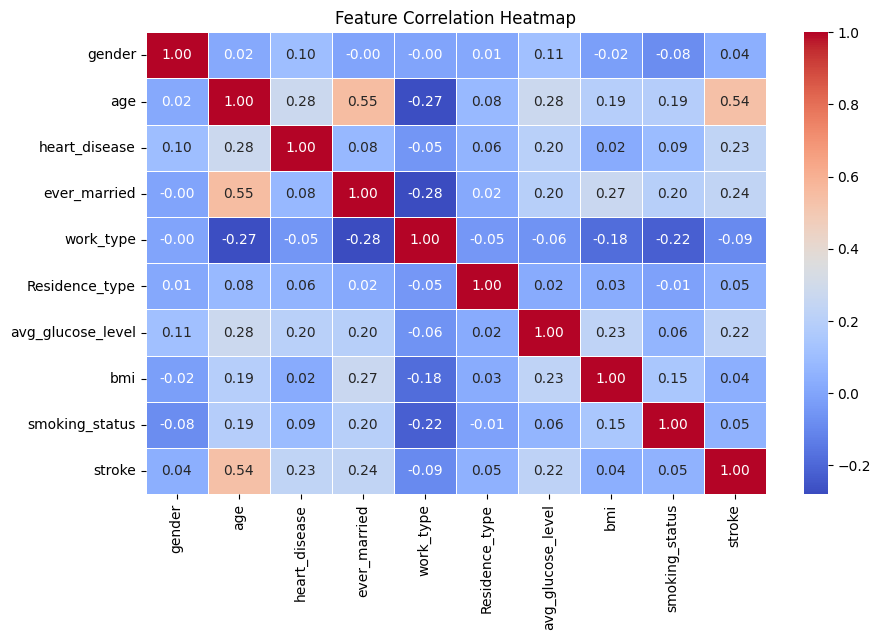

In [20]:
# Compute the correlation matrix
corr_matrix = df.corr()

# Create the heatmap
plt.figure(figsize=(10, 6))  # Adjust the figure size
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Show the plot
plt.title("Feature Correlation Heatmap")
plt.show()


In [21]:
# Define features and target variable
X = df.drop(columns=['stroke'])  # Independent
y = df['stroke']  # Dependent

# Split data into training (80%) and testing (20%) and stratify=y ensures the class distribution remains balance
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)



In [22]:
# Standardization helps neural networks converge faster and improves performance.
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# Interpretation:
# If we don’t standardize, the neural network might think glucose level is more important just because the numbers 
# are bigger—even if age or BMI is a better signal for predicting strokes.


In [23]:
# Build the MLP model

mlp = MLPClassifier(hidden_layer_sizes=(64,32,16),
                    random_state=5,
                    verbose=True,
                    learning_rate_init=0.001,
                    max_iter=3000)  # Balances stroke (1s) and non-stroke (0s)




# Train the model
mlp.fit(X_train, y_train)

# Interpretation
# MLPClassifier is a Multi-Layer Perceptron (MLP) neural network for classification.
# hidden_layer_sizes=(100,) → Uses one hidden layer with 100 neurons.
# max_iter=500 → The network trains for a maximum of 500 iterations.
# activation='relu' → Uses ReLU activation function (better for deep networks).
# solver='adam' → Uses Adam optimizer, which adapts learning rates dynamically.


Iteration 1, loss = 0.72649136
Iteration 2, loss = 0.69561677
Iteration 3, loss = 0.66900372
Iteration 4, loss = 0.64710174
Iteration 5, loss = 0.62730136
Iteration 6, loss = 0.61000933
Iteration 7, loss = 0.59338985
Iteration 8, loss = 0.57843215
Iteration 9, loss = 0.56466276
Iteration 10, loss = 0.55173286
Iteration 11, loss = 0.53958432
Iteration 12, loss = 0.52820004
Iteration 13, loss = 0.51758914
Iteration 14, loss = 0.50803213
Iteration 15, loss = 0.49945284
Iteration 16, loss = 0.48997281
Iteration 17, loss = 0.48177869
Iteration 18, loss = 0.47451275
Iteration 19, loss = 0.46742172
Iteration 20, loss = 0.46066019
Iteration 21, loss = 0.45493419
Iteration 22, loss = 0.44916413
Iteration 23, loss = 0.44450722
Iteration 24, loss = 0.43977536
Iteration 25, loss = 0.43627372
Iteration 26, loss = 0.43185065
Iteration 27, loss = 0.42890810
Iteration 28, loss = 0.42552771
Iteration 29, loss = 0.42255495
Iteration 30, loss = 0.41976713
Iteration 31, loss = 0.41680906
Iteration 32, los

MLPClassifier(hidden_layer_sizes=(64, 32, 16), max_iter=3000, random_state=5,
              verbose=True)

In [24]:
# The trained model predicts stroke occurrences on test data.
y_pred = mlp.predict(X_test)


In [25]:
# Model accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Model Accuracy: 0.72
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.76      0.78        90
           1       0.60      0.66      0.63        50

    accuracy                           0.72       140
   macro avg       0.70      0.71      0.70       140
weighted avg       0.73      0.72      0.72       140

Confusion Matrix:
 [[68 22]
 [17 33]]
